### **Anggota Kelompok 3**
1. Chamillatul Luqiana Agustin / 09
2. Irsyad Danisaputra / 17
3. Ravi Wimar Afiansyah / 23
4. Reza Arya Wijaya / 24

# Segmentasi Gambar dengan Clustering

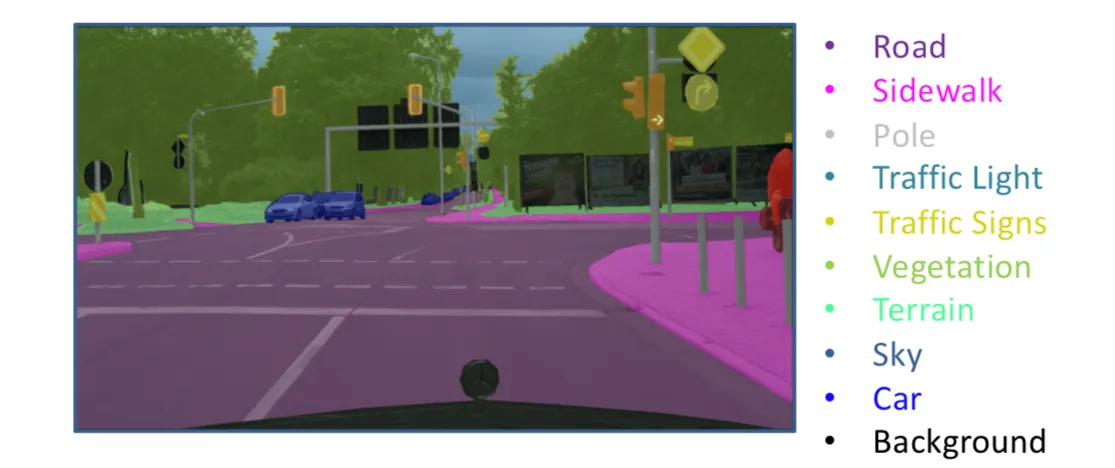

Segmentasi merupakan salah satu cara untuk membedakan antara objek satu dengan objek lainnya dalam suatu citra. Cara ini dapat dilakukan dengan mengelompokkan nilai pixel citra berdasarkan kedekatan warnanya.

Pada UTS kali ini, Anda diminta untuk melakukan segmentasi citra plat nomor kendaraan di Indonesia. Fungsi segmentasi dalam kasus ini adalah mempermudah pembacaan plat nomor kendaraan sebelum proses selanjutnya, seperti pembacaan karakter pada plat nomor.

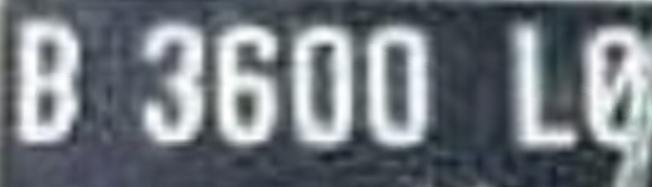

# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

**Open Challange** (Opsional)
 - Bagaimana cara melakukan evaluasi pada hasil segementasi?
 - Terapkan pada kasus ini!


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

#### **Import library**

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from pathlib import Path
import glob
import os

#### **Membuat fungsi untuk load gambar dan plotting warna**

In [2]:
def read_specific_images(filenames):
    images = []
    for filename in filenames:
        img = cv2.imread(filename)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        if img is not None:
            images.append(img)
        else:
            print(f"Warning: Could not read {filename}")
    return images

In [3]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

#### **Load images**

In [ ]:

filename = [
    'datasets/plat_nomor1.jpg',
    'datasets/plat_nomor2.jpg',
    'datasets/plat_nomor3.jpg',
    'datasets/plat_nomor4.jpg',
    'datasets/plat_nomor5.jpg',
]

img = read_specific_images(filename)

#### **Color space setiap plat nomor**

<Figure size 1200x700 with 0 Axes>

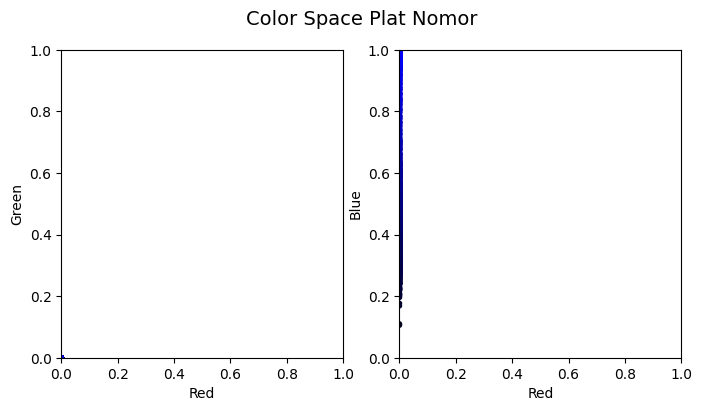

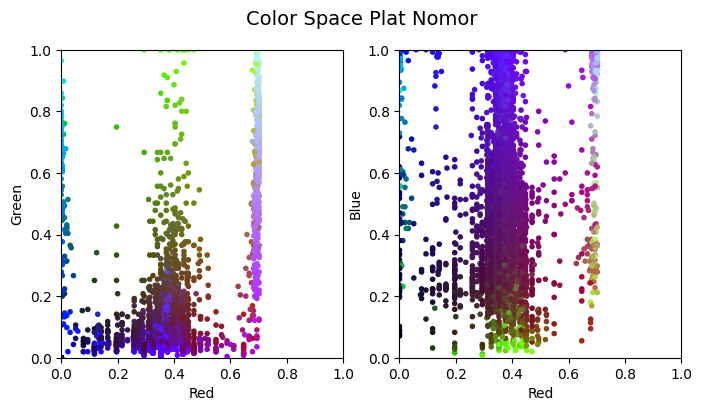

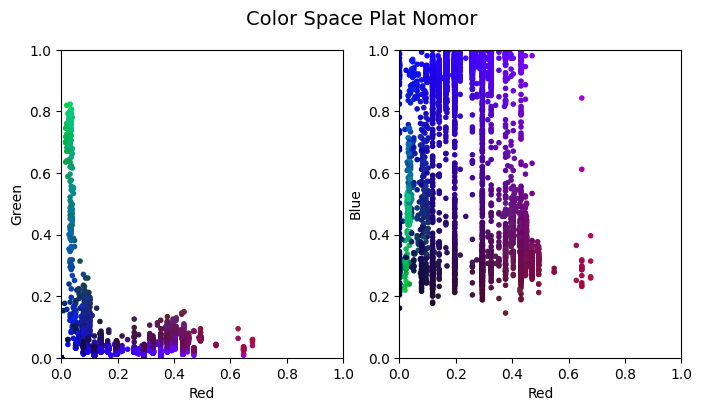

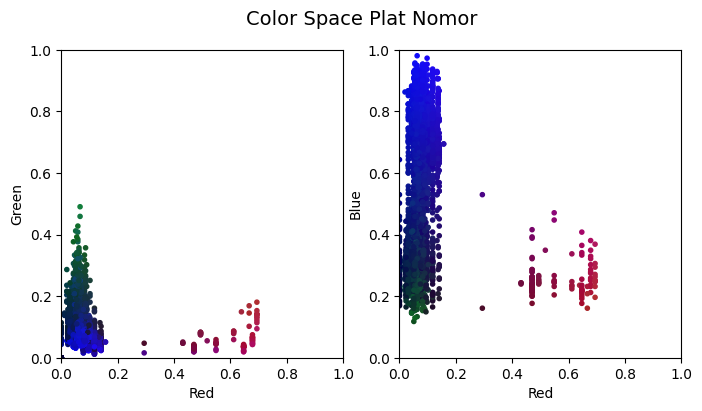

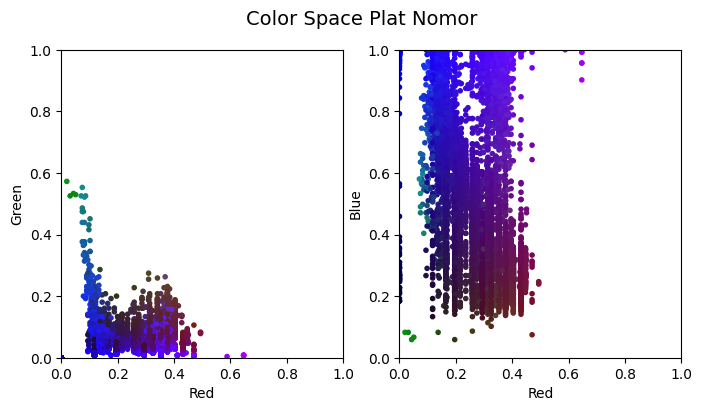

In [6]:
plt.figure(figsize=(12,7))
for image in img:
    h, w, ch =  image.shape
    data = image/255.0
    data = data.reshape(h * w, ch)
    plot_pixels(data, title="Color Space Plat Nomor")
plt.show()

#### **Import Kmeans dari sklearn**

In [7]:
from sklearn.cluster import KMeans

#### **Membuat model Kmeans**

In [8]:
model_kmeans = KMeans(n_clusters=2)

#### **Membuat fungsi untuk menampilkan hasil segmentasi**

In [12]:
def display_clustering_result(original_image, clustered_labels, figsize=(12, 6)):
    """
    Display original image alongside its clustered version
    
    Parameters:
    original_image: numpy array of original image
    clustered_labels: numpy array of clustering labels
    figsize: tuple of figure size (width, height)
    """
    # Ensure clustered_labels are in correct shape
    if clustered_labels.ndim == 1:
        # Reshape labels to match image dimensions
        clustered_labels = clustered_labels.reshape(original_image.shape[0], original_image.shape[1])
    
    plt.figure(figsize=figsize)
    
    # Original image
    plt.subplot(121)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')
    
    # Clustered result
    plt.subplot(122)
    # Convert labels to float and normalize to [0,1] range for display
    labels_normalized = clustered_labels.astype(float) / clustered_labels.max()
    plt.imshow(labels_normalized, cmap='binary')
    plt.title('Clustered Result')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

#### **Fitting model dan memanggil fungsi display_clustering_result**

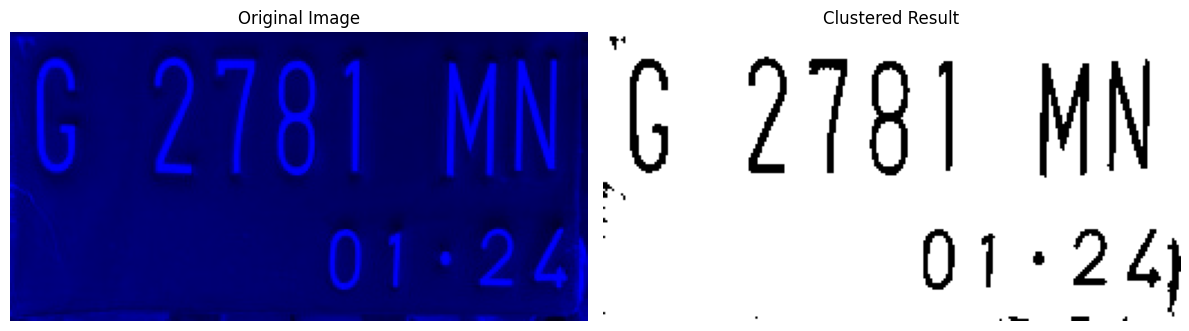

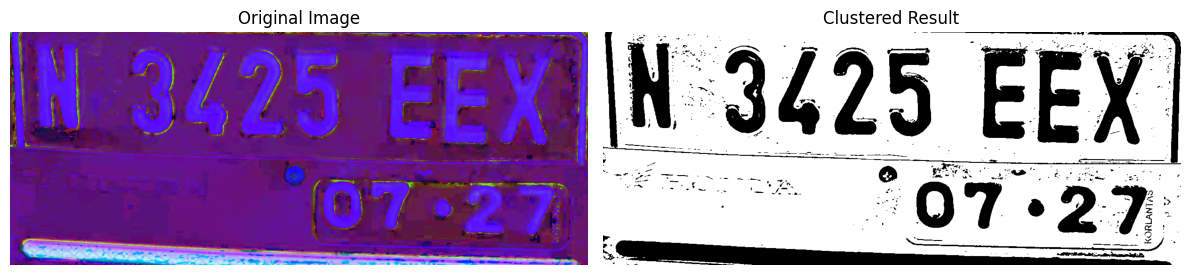

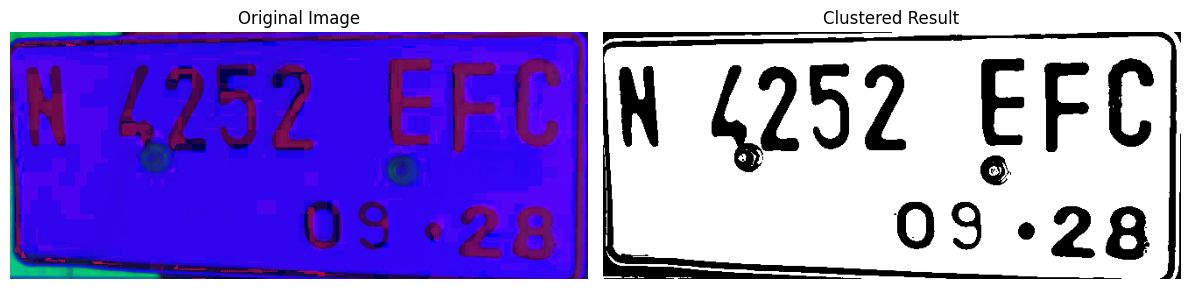

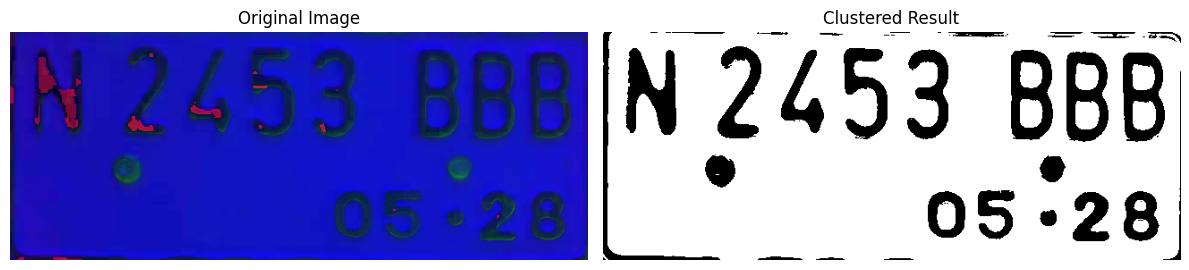

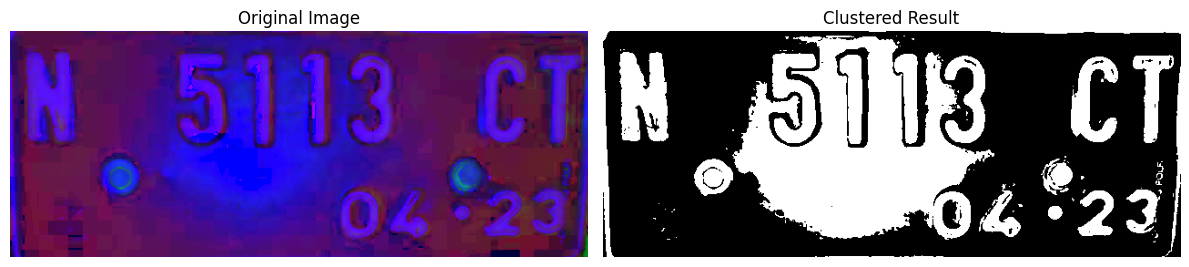

In [30]:
for image in img:
    img_reshaped = image.reshape(-1, image.shape[-1])

    # Now fit KMeans
    ykmeans = model_kmeans.fit_predict(img_reshaped)

    # If you need to display the results, reshape ykmeans back to original image dimensions
    ykmeans_reshaped = ykmeans.reshape(image.shape[0], image.shape[1])
    display_clustering_result(image, ykmeans_reshaped)

#### **Evaluasi hasil segmentasi**

In [26]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [23]:
def evaluate_segmentation(img, labels):
    """
    Evaluate segmentation quality using internal metrics
    """
    # Convert data and reshape
    img_data = np.array(img).reshape(-1, img.shape[-1])
    labels = np.array(labels).flatten()
    
    # Calculate metrics
    sil_score = silhouette_score(img_data, labels)
    ch_score = calinski_harabasz_score(img_data, labels)
    db_score = davies_bouldin_score(img_data, labels)
    
    print("Segmentation Quality Metrics:")
    print(f"Silhouette Score: {sil_score:.3f} (higher is better, range: -1 to 1)")
    print(f"Calinski-Harabasz Score: {ch_score:.3f} (higher is better)")
    print(f"Davies-Bouldin Score: {db_score:.3f} (lower is better)")
    
    return sil_score, ch_score, db_score

In [24]:
def visualize_clusters(img, labels, n_clusters):
    """
    Visualize each cluster separately
    """
    # Reshape arrays
    height, width = img.shape[:2]
    labels = labels.reshape(height, width)
    
    plt.figure(figsize=(15, 3))
    
    # Original image
    plt.subplot(1, n_clusters + 1, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')
    
    # Show each cluster
    for i in range(n_clusters):
        plt.subplot(1, n_clusters + 1, i + 2)
        
        # Create mask for current cluster
        mask = (labels == i)
        cluster_img = img.copy()
        # Make non-cluster pixels black
        cluster_img[~mask] = [0, 0, 0]
        
        plt.imshow(cluster_img)
        plt.title(f'Cluster {i}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

In [35]:
for i in range(5):
    scores = evaluate_segmentation(image[i], ykmeans_reshaped[i])
    print('\n')

Segmentation Quality Metrics:
Silhouette Score: 0.679 (higher is better, range: -1 to 1)
Calinski-Harabasz Score: 2407.954 (higher is better)
Davies-Bouldin Score: 0.466 (lower is better)


Segmentation Quality Metrics:
Silhouette Score: 0.733 (higher is better, range: -1 to 1)
Calinski-Harabasz Score: 3006.179 (higher is better)
Davies-Bouldin Score: 0.391 (lower is better)


Segmentation Quality Metrics:
Silhouette Score: 0.649 (higher is better, range: -1 to 1)
Calinski-Harabasz Score: 497.361 (higher is better)
Davies-Bouldin Score: 0.440 (lower is better)


Segmentation Quality Metrics:
Silhouette Score: 0.830 (higher is better, range: -1 to 1)
Calinski-Harabasz Score: 269.911 (higher is better)
Davies-Bouldin Score: 0.374 (lower is better)


Segmentation Quality Metrics:
Silhouette Score: 0.769 (higher is better, range: -1 to 1)
Calinski-Harabasz Score: 122.080 (higher is better)
Davies-Bouldin Score: 0.384 (lower is better)


